In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data.csv")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
import category_encoders as ce
data = pd.DataFrame({'cat':['date','price','street','city','statezip','country']})
encoder = ce.BinaryEncoder(cols=['cat'])
encoded = encoder.fit_transform(data)
print(encoded)

C:\anacondaa\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   cat_0  cat_1  cat_2
0      0      0      1
1      0      1      0
2      0      1      1
3      1      0      0
4      1      0      1
5      1      1      0


In [8]:
x=df.drop(['date','price','street','city','statezip','country'],axis=True)
y=df['price']

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [11]:
models = {
    "Lasso Regression": make_pipeline(StandardScaler(), Lasso(alpha=1.0, random_state=42)),
    "Polynomial Regression (Degree 2)": make_pipeline(StandardScaler(),
                                                      PolynomialFeatures(degree=2, include_bias=False),
                                                      LinearRegression()),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42)
}

In [12]:
results = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    r2 = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    
    results[name] = {'R²': r2, 'MAE': mae, 'RMSE': rmse}
    print(f" {name}")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("-"*35)

C:\anacondaa\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


 Lasso Regression
R² Score: 0.032
MAE: 210908.295
RMSE: 993439.611
-----------------------------------
 Polynomial Regression (Degree 2)
R² Score: 0.031
MAE: 210256.489
RMSE: 994064.856
-----------------------------------
 Random Forest Regressor
R² Score: 0.028
MAE: 208109.707
RMSE: 995879.436
-----------------------------------
 XGBoost Regressor
R² Score: 0.029
MAE: 206328.074
RMSE: 995328.533
-----------------------------------


In [13]:
results_df = pd.DataFrame(results).T
print("\n Model Comparison:\n")
print(results_df)


 Model Comparison:

                                        R²            MAE           RMSE
Lasso Regression                  0.032283  210908.295460  993439.610791
Polynomial Regression (Degree 2)  0.031065  210256.488865  994064.856169
Random Forest Regressor           0.027524  208109.706986  995879.436475
XGBoost Regressor                 0.028600  206328.074089  995328.533048


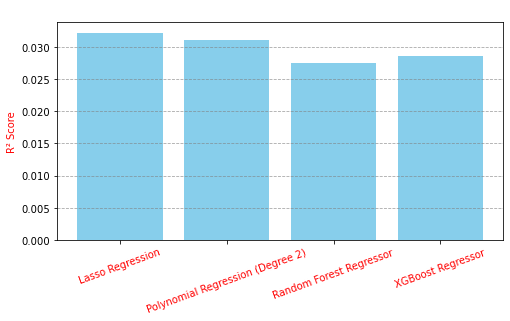

In [14]:
plt.figure(figsize=(8, 4))
plt.bar(results_df.index, results_df['R²'], color='skyblue')
plt.title("Model Comparison (R² Score)",color='white')
plt.ylabel("R² Score",color='red')
plt.xticks(rotation=20,color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7,color='gray')
plt.show()